In [1]:
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import swifter

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/training.csv', encoding="ISO-8859-1", header=None)
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'tweet']

print(data.head())

   sentiment          id                          date     query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                              tweet  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [6]:
print(f"Size of the dataset: {data.shape}\n\n")
print(f"Missing Values: {data.isnull().sum()}\n\n")
print(f"Duplicated Values: {data.duplicated().sum()} \n")

Size of the dataset: (1600000, 6)


Missing Values: sentiment    0
id           0
date         0
query        0
user         0
tweet        0
dtype: int64


Duplicated Values: 0 



### There are no missing or duplicate values.

In [7]:
# label 4 to positive and 0 to negative
data = data[['sentiment', 'tweet']]
data['sentiment'] = data['sentiment'].apply(lambda x: "Positive" if x == 4 else "Negative")
print(data.head(3))

  sentiment                                              tweet
0  Negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  Negative  is upset that he can't update his Facebook by ...
2  Negative  @Kenichan I dived many times for the ball. Man...


[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

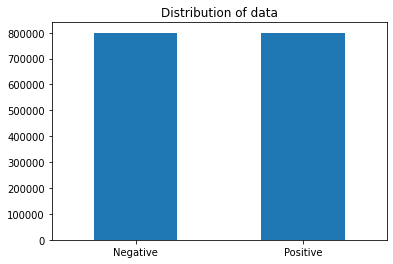

In [8]:
# Plot distribution of sentiments
ax = data['sentiment'].value_counts().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [9]:
stop_words = set(stopwords.words('english'))
stop_words.add('quot')
stop_words.add('amp')
lemma = WordNetLemmatizer()

def preprocess(text):
  text = str(text).lower().strip()
  text = re.sub(r'http\S+|www.\S+', '', text)
  text = re.sub(r'@\S+', '', text)
  text = re.sub(r'#\S+', '', text)
  text = re.sub(r'RT', '', text)
  text = re.sub(r'(.)\1\1+', r'\1\1', text)
  text = re.sub("[^a-zA-Z0-9]", " ", text)
  text = word_tokenize(text)
  text = [item for item in text if item not in stop_words]
  text = [lemma.lemmatize(w) for w in text]
  text = [i for i in text if len(i) > 1]
  text = ' '.join(text)
  return text

print(preprocess("https://www.google.com heyyyyyyyy this is an awesome tweet about machine learning @iamvinitk #machine-learning :-) "))

heyy awesome tweet machine learning


In [10]:
%%time
data['tweet'] = data['tweet'].swifter.apply(lambda x : preprocess(x))

Pandas Apply:   0%|          | 0/1600000 [00:00<?, ?it/s]

CPU times: user 4min 11s, sys: 2.42 s, total: 4min 14s
Wall time: 4min 27s


In [12]:
print(data.head(3))
data.to_csv("/content/drive/MyDrive/Colab Notebooks/data/training_cleaned.csv")

  sentiment                                              tweet
0  Negative        aww bummer shoulda got david carr third day
1  Negative  upset update facebook texting might cry result...
2  Negative  dived many time ball managed save 50 rest go b...


(800000, 2)


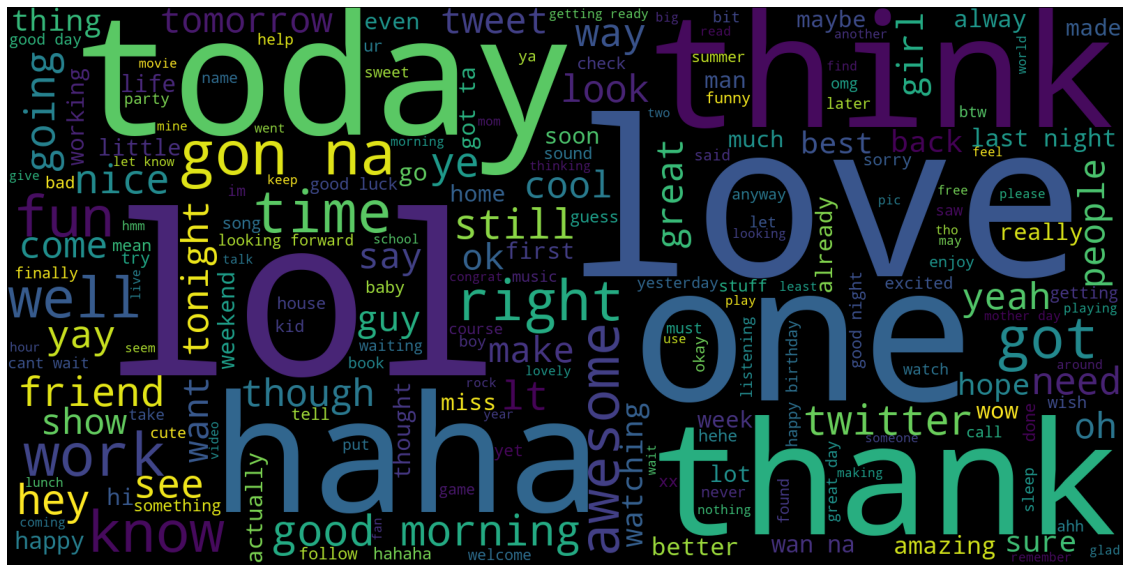

In [13]:
positive_tweets = data[data["sentiment"] == "Positive"]
print(positive_tweets.shape)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 200 , width = 1600 , height = 800).generate(" ".join(positive_tweets["tweet"]))
plt.axis('off')
plt.imshow(wc)
wc.to_file("/content/drive/MyDrive/Colab Notebooks/images/positive_tweets.png")

(800000, 2)


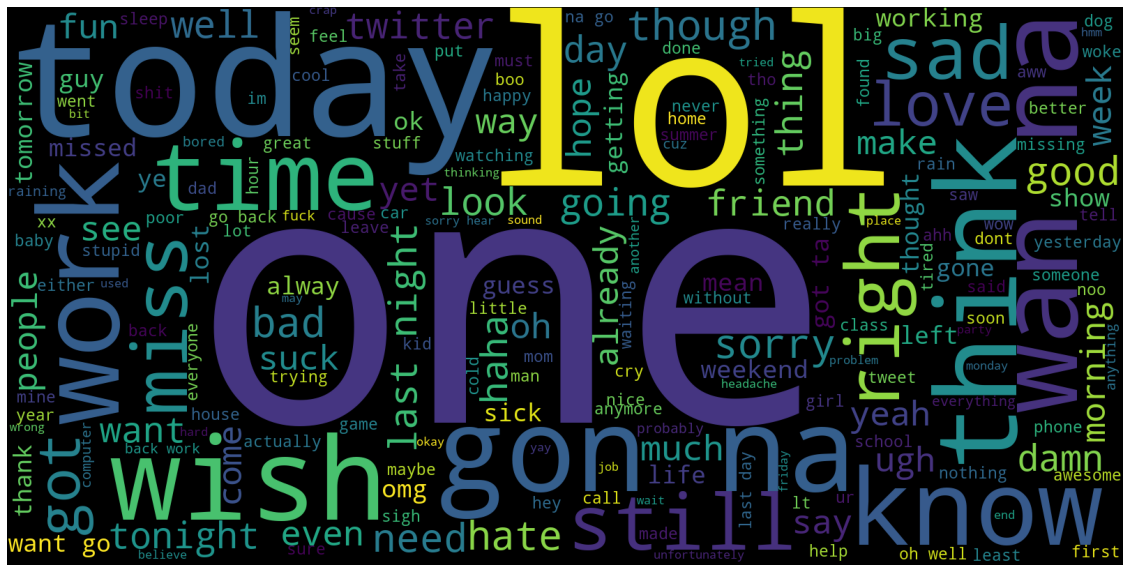

In [14]:
negative_tweets = data[data["sentiment"] == "Negative"]
print(negative_tweets.shape)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 200 , width = 1600 , height = 800).generate(" ".join(negative_tweets["tweet"]))
plt.axis('off')
plt.imshow(wc)
wc.to_file("/content/drive/MyDrive/Colab Notebooks/images/negative_tweets.png")

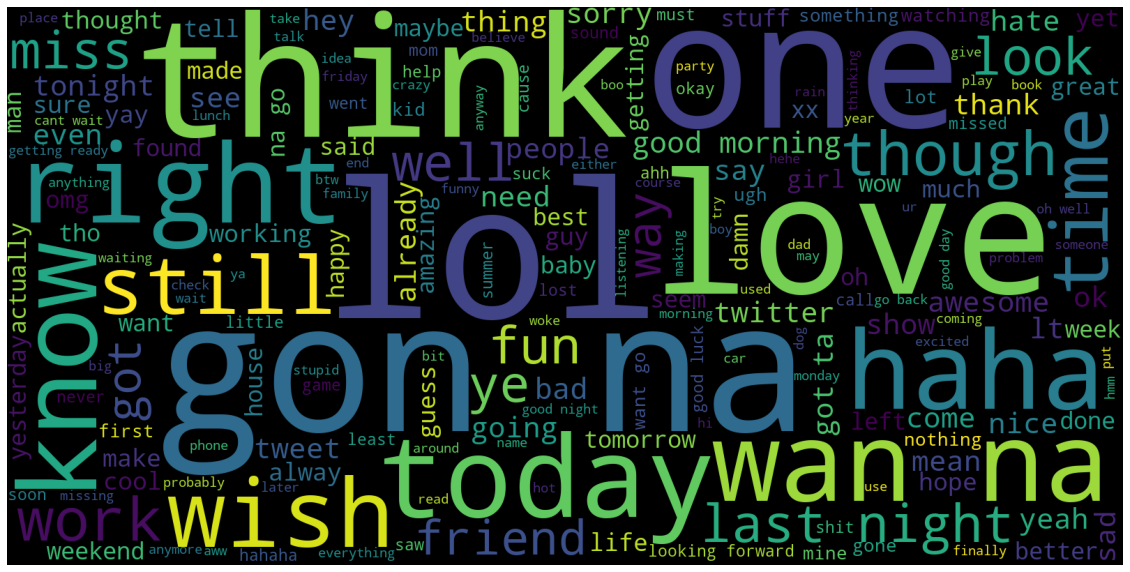

In [15]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 200 , width = 1600 , height = 800).generate(" ".join(data["tweet"]))
plt.axis('off')
plt.imshow(wc)
wc.to_file("/content/drive/MyDrive/Colab Notebooks/images/tweets.png")